<a href="https://colab.research.google.com/github/Daps2831/Machine-Learning/blob/main/UAS/RegresiUTSTelkom_UAS_ML_Daffa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Ganti path sesuai lokasi file di Google Drive
file_path = "/content/drive/MyDrive/Dataset/RegresiUTSTelkom.csv"
# Membaca file Excel
df = pd.read_csv(file_path)



# Pipeline End-to-End untuk Regresi Model Deep Learning

## Pembersihan data

Langkah pertama adalah memuat data Anda menggunakan Pandas, memberinya nama kolom, dan memeriksa apakah ada data yang hilang (missing values).

In [ ]:
import pandas as pd
import numpy as np


# Memberi nama kolom agar lebih mudah diakses
# Kolom pertama adalah target 'Tahun'
kolom_fitur = [f'x{i}' for i in range(1, 91)]
nama_kolom = ['Tahun'] + kolom_fitur
df.columns = nama_kolom

# Menampilkan 5 baris pertama untuk inspeksi
print("Data Awal:")
print(df.head())

# --- Pembersihan Data ---

# 1. Cek informasi dasar dan tipe data
print("\nInfo Dataset:")
df.info()

# 2. Cek nilai yang hilang (missing values)
print("\nJumlah Nilai Hilang per Kolom:")
print(df.isnull().sum())

# Jika ada nilai yang hilang (misalnya di kolom 'x10'), Anda bisa:
# Opsi A: Mengisi dengan nilai rata-rata (mean) atau median (karena semua numerik)
# df['x10'].fillna(df['x10'].mean(), inplace=True)
# Opsi B: Menghapus baris yang memiliki nilai hilang
# df.dropna(inplace=True)

# Asumsikan data sudah bersih setelah langkah di atas

# --- Memisahkan Fitur dan Target ---
X = df.drop('Tahun', axis=1)
y = df['Tahun']

print("\nDimensi Fitur (X):", X.shape)
print("Dimensi Target (y):", y.shape)

Data Awal:
   Tahun        x1        x2        x3        x4        x5        x6  \
0   2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   
1   2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940   
2   2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   
3   2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409   
4   2001  50.54767   0.31568  92.35066  22.38696 -25.51870 -19.04928   

         x7        x8        x9  ...       x81        x82       x83       x84  \
0   8.76630  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836   
1  -3.27872  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792   
2   5.05097 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617   
3 -12.48207  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522   
4  20.67345  -5.19943   3.63566  ...   6.59753  -50.69577  26.02574  18.94430   

        x85       x86        x87       x88        x89       x90  
0  

In [ ]:
# Menampilkan 10 fitur dengan korelasi tertinggi dan terendah dengan 'Tahun'
print(df.corr()['Tahun'].sort_values(ascending=False).head(10))
print(df.corr()['Tahun'].sort_values(ascending=False).tail(10))

Tahun    1.000000
x1       0.225373
x7       0.110461
x47      0.096088
x20      0.087057
x73      0.083754
x74      0.081748
x68      0.081341
x14      0.078700
x38      0.074424
Name: Tahun, dtype: float64
x57   -0.096973
x12   -0.097163
x69   -0.099484
x36   -0.101006
x46   -0.101324
x67   -0.102841
x40   -0.123975
x63   -0.126348
x3    -0.139542
x6    -0.187443
Name: Tahun, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Tahun   515344 non-null  int64  
 1   x1      515344 non-null  float64
 2   x2      515344 non-null  float64
 3   x3      515344 non-null  float64
 4   x4      515344 non-null  float64
 5   x5      515344 non-null  float64
 6   x6      515344 non-null  float64
 7   x7      515344 non-null  float64
 8   x8      515344 non-null  float64
 9   x9      515344 non-null  float64
 10  x10     515344 non-null  float64
 11  x11     515344 non-null  float64
 12  x12     515344 non-null  float64
 13  x13     515344 non-null  float64
 14  x14     515344 non-null  float64
 15  x15     515344 non-null  float64
 16  x16     515344 non-null  float64
 17  x17     515344 non-null  float64
 18  x18     515344 non-null  float64
 19  x19     515344 non-null  float64
 20  x20     515344 non-null  float64
 21  x21     51

In [ ]:
df.head()

,Tahun,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


## Feature engineering

Karena semua data Anda sudah numerik, fokus utama kita adalah Normalisasi/Standardisasi.

Mengapa perlu? Algoritma Deep Learning, terutama yang menggunakan Gradient Descent, bekerja lebih cepat dan stabil jika semua fitur memiliki skala yang sama. Ini mencegah fitur dengan rentang nilai besar (mis. jutaan) mendominasi fitur dengan rentang kecil (mis. 0-1).

Label Encoding & One-Hot Encoding: Seperti yang Anda sebutkan, ini digunakan untuk data kategorikal. Karena semua kolom Anda numerik, langkah ini tidak diperlukan.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Membagi data menjadi data latih (training) dan data uji (testing)
# Ini penting! Scaling harus dilakukan setelah data dibagi untuk menghindari data leakage.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Transformasi Data (Standardisasi)
# Kita akan menggunakan StandardScaler yang akan mengubah data sehingga memiliki mean=0 dan std_dev=1
scaler = StandardScaler()

# 'Fit' scaler HANYA pada data latih
scaler.fit(X_train)

# 'Transform' data latih dan data uji dengan scaler yang sama
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame agar mudah dilihat (opsional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nData setelah di-scaling (5 baris pertama):")
print(X_train_scaled.head())


Data setelah di-scaling (5 baris pertama):
         x1        x2        x3        x4        x5        x6        x7  \
0 -0.696370 -1.774271  0.639630 -0.043500  1.740164 -0.459903  0.728395   
1 -0.052565 -0.658111  1.892878  0.044908 -0.060538 -0.500996 -1.800259   
2 -0.344360 -1.014429 -1.390594 -0.083526  0.241891 -0.109252  1.008885   
3  1.382599  1.173052 -0.657868  0.046274  1.495153 -0.971042  0.203681   
4 -0.033857  0.920526 -0.783006 -1.051937 -0.093576  0.438804 -0.633220   

         x8        x9       x10  ...       x81       x82       x83       x84  \
0 -0.388528  1.061439 -1.547154  ... -0.330411 -3.184229  0.635939 -1.546936   
1 -0.471097  0.842529 -0.003068  ... -0.873236  0.964871  0.399765  0.092779   
2 -1.012834  1.320572 -0.987752  ...  2.283325 -2.210901 -0.933118 -0.310747   
3  0.887095 -0.222953  0.225067  ... -0.529363  0.426234 -1.011758 -0.653066   
4 -0.934634 -0.907878 -0.459376  ... -0.620918  0.864593 -0.324793 -0.110036   

        x85       x86   

# Modelling

## Model 1: TensorFlow (dengan Keras API)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# --- Membangun Arsitektur MLP ---
# Kita akan membuat model Sequential
# Coba arsitektur ini untuk TensorFlow dan PyTorch
model_mlp_simple_tf = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),

    # Hanya satu atau dua hidden layer dengan neuron lebih sedikit
    Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    # BatchNormalization tetap penting
    BatchNormalization(),
    Dropout(0.3), # Dropout rate bisa disesuaikan

    # (Opsional) Layer kedua yang lebih kecil
    # Dense(32, activation='relu', kernel_regularizer=l2(1e-4)),
    # BatchNormalization(),
    # Dropout(0.2),

    Dense(1) # Output layer
])

# --- Konfigurasi Optimizer dan Learning Rate ---
# Adam adalah optimizer modern yang efisien
# Kita set learning rate awal, yang nanti bisa disesuaikan oleh callback
optimizer = Adam(learning_rate=0.001)

# --- Meng-compile Model ---
model_mlp_simple_tf.compile(
    optimizer=optimizer,
    loss='mean_squared_error', # Loss function yang umum untuk regresi
    metrics=['mean_squared_error', 'mean_absolute_error'] # Metrik untuk monitoring
)

# --- Menerapkan Callbacks ---
# 1. Early Stopping: Menghentikan training jika tidak ada peningkatan performa
early_stopping = EarlyStopping(
    monitor='val_loss', # Memantau loss di data validasi
    patience=10,        # Jumlah epoch untuk menunggu sebelum berhenti
    restore_best_weights=True # Mengembalikan bobot terbaik saat training berhenti
)

# 2. Learning Rate Scheduling: Mengurangi learning rate jika performa stagnan
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # Faktor pengurangan (new_lr = lr * factor)
    patience=5,
    min_lr=1e-6 # Learning rate minimum
)

# --- Ringkasan Model ---
model_mlp_simple_tf.summary()

# --- Melatih Model ---
print("\nMemulai training model TensorFlow...")
history = model_mlp_simple_tf.fit(
    X_train_scaled, y_train,
    epochs=100, # Jumlah maksimum epoch (akan berhenti lebih awal jika early stopping terpicu)
    batch_size=128,
    validation_split=0.2, # Menggunakan 20% data training untuk validasi
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)
print("Training TensorFlow selesai.")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,913 (89.50 KB)

 Trainable params: 22,465 (87.75 KB)

 Non-trainable params: 448 (1.75 KB)


Memulai training model TensorFlow...
Epoch 1/100
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 3783567.7500 - mean_absolute_error: 1943.1025 - mean_squared_error: 3783567.7500 - val_loss: 2410125.5000 - val_mean_absolute_error: 1547.4141 - val_mean_squared_error: 2410125.5000 - learning_rate: 0.0010
Epoch 2/100
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 1834785.7500 - mean_absolute_error: 1329.3987 - mean_squared_error: 1834785.7500 - val_loss: 497315.6562 - val_mean_absolute_error: 685.3950 - val_mean_squared_error: 497315.5625 - learning_rate: 0.0010
Epoch 3/100
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 301795.9688 - mean_absolute_error: 484.2232 - mean_squared_error: 301795.8438 - val_loss: 9024.4658 - val_mean_absolute_error: 74.9481 - val_mean_squared_error: 9024.3584 - learning_rate: 0.0010
Epoch 4/100
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 47816.4844 - mean_absolute_error: 167.2870 - mean_squared_error: 47816.3867 - val_loss: 2222.4136 - va

## Model 2: PyTorch

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# --- Konversi Data ke PyTorch Tensors ---
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# --- Membuat DataLoader ---
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

# --- Membangun Arsitektur MLP ---
class MLP_PyTorch(nn.Module):
    def __init__(self, input_features):
        super(MLP_PyTorch, self).__init__()
        self.layers = nn.Sequential(
            # Hidden Layer 1
            nn.Linear(input_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            # Hidden Layer 2
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            # Hidden Layer 3
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),

            # Output Layer
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)

model_pt = MLP_PyTorch(X_train_scaled.shape[1])

# --- Loss Function dan Optimizer ---
criterion = nn.MSELoss() # Setara dengan 'mean_squared_error' di Keras
# Adam optimizer dengan weight_decay untuk regularisasi L2
optimizer_pt = torch.optim.Adam(model_pt.parameters(), lr=0.001, weight_decay=1e-4)

# Learning Rate Scheduler (setara dengan ReduceLROnPlateau)
scheduler_pt = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_pt, 'min', patience=5, factor=0.2)

# ======================================================
# GANTI BAGIAN TRAINING LOOP PYTORCH ANDA DENGAN INI
# ======================================================

print("\nMemulai training model PyTorch (dengan loop yang sudah diperbaiki)...")
num_epochs = 100
# Untuk memantau loss validasi untuk scheduler & early stopping (opsional)
best_val_loss = float('inf')

for epoch in range(num_epochs):
    model_pt.train() # Set model ke mode training
    running_loss = 0.0

    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model_pt(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward and optimize
        optimizer_pt.zero_grad()
        loss.backward()
        optimizer_pt.step()

        running_loss += loss.item()

    # Hitung rata-rata loss untuk epoch ini
    epoch_loss = running_loss / len(train_loader)

    # Panggil scheduler berdasarkan rata-rata loss epoch
    # (Catatan: Untuk ReduceLROnPlateau, idealnya kita pakai validation loss,
    # tapi untuk menyederhanakan, kita pakai training loss di sini)
    scheduler_pt.step(epoch_loss)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, LR: {optimizer_pt.param_groups[0]["lr"]}')

print("Training PyTorch selesai.")


Memulai training model PyTorch (dengan loop yang sudah diperbaiki)...
Epoch [10/100], Loss: 34867.5253, LR: 0.001
Epoch [20/100], Loss: 30894.9178, LR: 0.001
Epoch [30/100], Loss: 29412.0547, LR: 0.001
Epoch [40/100], Loss: 28571.6769, LR: 0.001
Epoch [50/100], Loss: 27800.9362, LR: 0.001
Epoch [60/100], Loss: 27144.3068, LR: 0.001
Epoch [70/100], Loss: 26450.6812, LR: 0.001
Epoch [80/100], Loss: 25768.0462, LR: 0.001
Epoch [90/100], Loss: 25195.5144, LR: 0.001
Epoch [100/100], Loss: 24521.8961, LR: 0.001
Training PyTorch selesai.


# Evaluasi

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
--- Matriks Evaluasi untuk TensorFlow ---
Mean Squared Error (MSE): 1635.2070
Root Mean Squared Error (RMSE): 40.4377
R-Squared (R²): -12.7774

--- Matriks Evaluasi untuk PyTorch ---
Mean Squared Error (MSE): 292.4130
Root Mean Squared Error (RMSE): 17.1001
R-Squared (R²): -1.4637



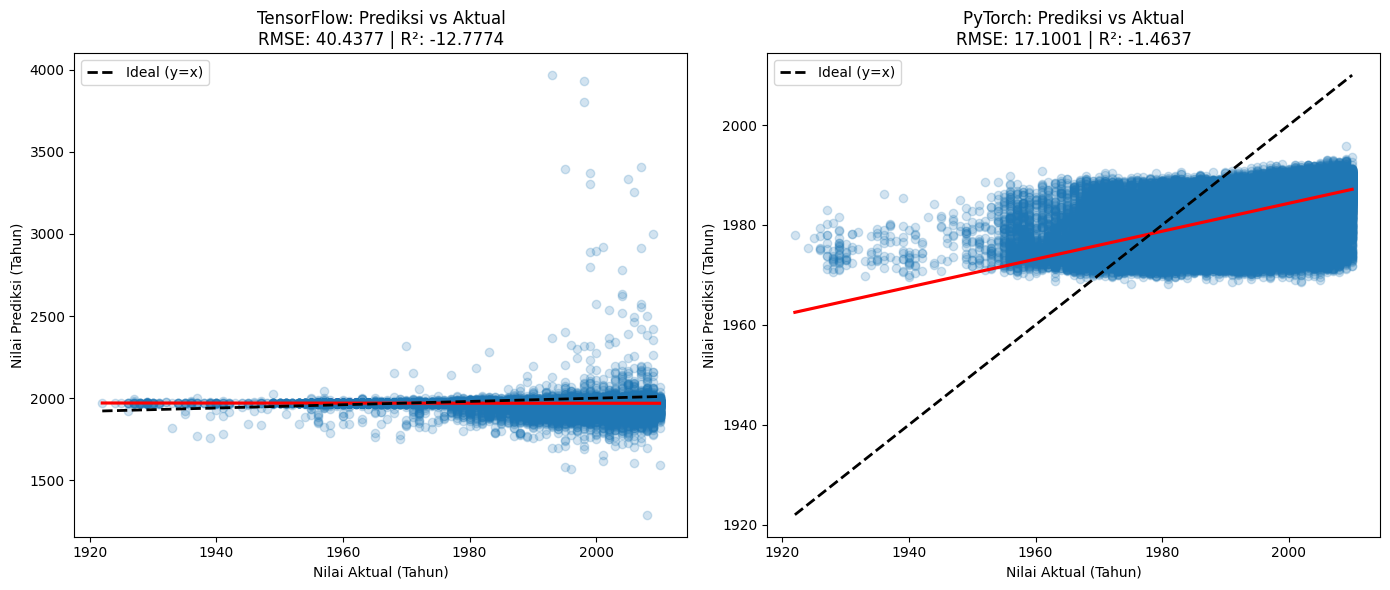

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Prediksi pada Data Uji ---

# TensorFlow
y_pred_tf = model_mlp_simple_tf.predict(X_test_scaled).flatten()

# PyTorch
model_pt.eval() # Set model ke mode evaluasi
with torch.no_grad():
    y_pred_pt = model_pt(X_test_tensor).flatten()
    # Convert PyTorch tensor to NumPy array
    y_pred_pt = y_pred_pt.numpy()


# --- Kalkulasi Matriks Evaluasi ---
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"--- Matriks Evaluasi untuk {model_name} ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-Squared (R²): {r2:.4f}\n")
    return rmse, r2

rmse_tf, r2_tf = evaluate_model(y_test, y_pred_tf, "TensorFlow")
rmse_pt, r2_pt = evaluate_model(y_test, y_pred_pt, "PyTorch")

# --- Visualisasi Hasil ---
plt.figure(figsize=(14, 6))

# Plot untuk TensorFlow
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred_tf, scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title(f'TensorFlow: Prediksi vs Aktual\nRMSE: {rmse_tf:.4f} | R²: {r2_tf:.4f}')
plt.xlabel('Nilai Aktual (Tahun)')
plt.ylabel('Nilai Prediksi (Tahun)')
# Tambahkan label pada garis y=x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal (y=x)')
plt.legend() # Tampilkan legenda

# Plot untuk PyTorch
plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=y_pred_pt, scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title(f'PyTorch: Prediksi vs Aktual\nRMSE: {rmse_pt:.4f} | R²: {r2_pt:.4f}')
plt.xlabel('Nilai Aktual (Tahun)')
plt.ylabel('Nilai Prediksi (Tahun)')
# Tambahkan label pada garis y=x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal (y=x)')
plt.legend() # Tampilkan legenda


plt.tight_layout()
plt.show()